# Download statistics of Zenodo records in the NFDI4BioImage community

In this notebook, we first determine all Zenodo-records in the [NFDI4BioImage Zenodo community](https://zenodo.org/communities/nfdi4bioimage/). We then filter our accumulated download statistics to only filter for records in the NFDI4BioImage community. 
The total number of downloads is then ploted over time, as well as the number of records.

In [1]:
import json
import time
from typing import Any, Dict, List, Optional
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime

BASE_URL = "https://zenodo.org/api/records"
COMMUNITY = "nfdi4bioimage"

token = os.getenv('ZENODO_API_KEY')

## Records in the NFDI4BioImage community

In [2]:
def get_json() -> Optional[Dict[str, Any]]:
    size_per_page = 100
    total_size = None
    page = 0
    import requests
    
    collection = []
    
    while True:
        page = page + 1
        response = requests.get('https://zenodo.org/api/records',
                                params={'communities': COMMUNITY,
                                        'access_token': token,
                                        'size': size_per_page, 
                                        'page': page})    
    
        data = response.json()
        #print(data)
        total_size = data["hits"]["total"]
        collection.extend(data["hits"]["hits"])

        print(total_size)

        if total_size < page * size_per_page:
            break
    return collection

In [3]:
data = get_json()

149
149


In [4]:
# Create lists to store the data
urls = []

for item in data:
    # Append to lists instead of printing
    urls.append(item["links"]["self"].replace("api/records/", "record/"))
    

# Create DataFrame
df = pd.DataFrame({
    'url': urls,
    
})

df.head()

,url
0,https://zenodo.org/record/17897525
1,https://zenodo.org/record/17876813
2,https://zenodo.org/record/17787401
3,https://zenodo.org/record/17856704
4,https://zenodo.org/record/17775761


## Accumulated download statistics

In [5]:
# Get all CSV files from the download_statistics folder
csv_folder = "../download_statistics"
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Read and combine all CSV files
all_data = []
for csv_file in csv_files:
    # Extract date from filename (e.g., "20240628.csv" -> "20240628")
    date_str = csv_file.replace('.csv', '')
    # Convert to datetime
    date = datetime.strptime(date_str, '%Y%m%d')
    
    # Read the CSV file
    file_path = os.path.join(csv_folder, csv_file)
    temp_df = pd.read_csv(file_path)
    temp_df['date'] = date
    
    all_data.append(temp_df)

len(all_data)

71

In [6]:
# Combine all dataframes
accumulated_df = pd.concat(all_data, ignore_index=True)
len(accumulated_df)

14958

In [7]:
accumulated_df['url']

0          https://zenodo.org/record/4071471
1          https://zenodo.org/record/3490058
2          https://zenodo.org/record/6602101
3         https://zenodo.org/records/8323588
4         https://zenodo.org/records/2643411
                        ...                 
14953    https://zenodo.org/records/17671971
14954    https://zenodo.org/records/17659149
14955    https://zenodo.org/records/17672046
14956    https://zenodo.org/records/17725097
14957    https://zenodo.org/records/17792816
Name: url, Length: 14958, dtype: object

In [8]:
accumulated_df['url'] = accumulated_df['url'].str.replace('/records/', '/record/')
accumulated_df['url']

0         https://zenodo.org/record/4071471
1         https://zenodo.org/record/3490058
2         https://zenodo.org/record/6602101
3         https://zenodo.org/record/8323588
4         https://zenodo.org/record/2643411
                        ...                
14953    https://zenodo.org/record/17671971
14954    https://zenodo.org/record/17659149
14955    https://zenodo.org/record/17672046
14956    https://zenodo.org/record/17725097
14957    https://zenodo.org/record/17792816
Name: url, Length: 14958, dtype: object

## Filter download statistics for NFDI4BioImage record urls 

In [9]:
# Filter to keep only rows where URL exists in df['url']
url_list = df['url'].tolist()
filtered_df = accumulated_df[accumulated_df['url'].isin(url_list)]
len(filtered_df)

3624

## Plotting

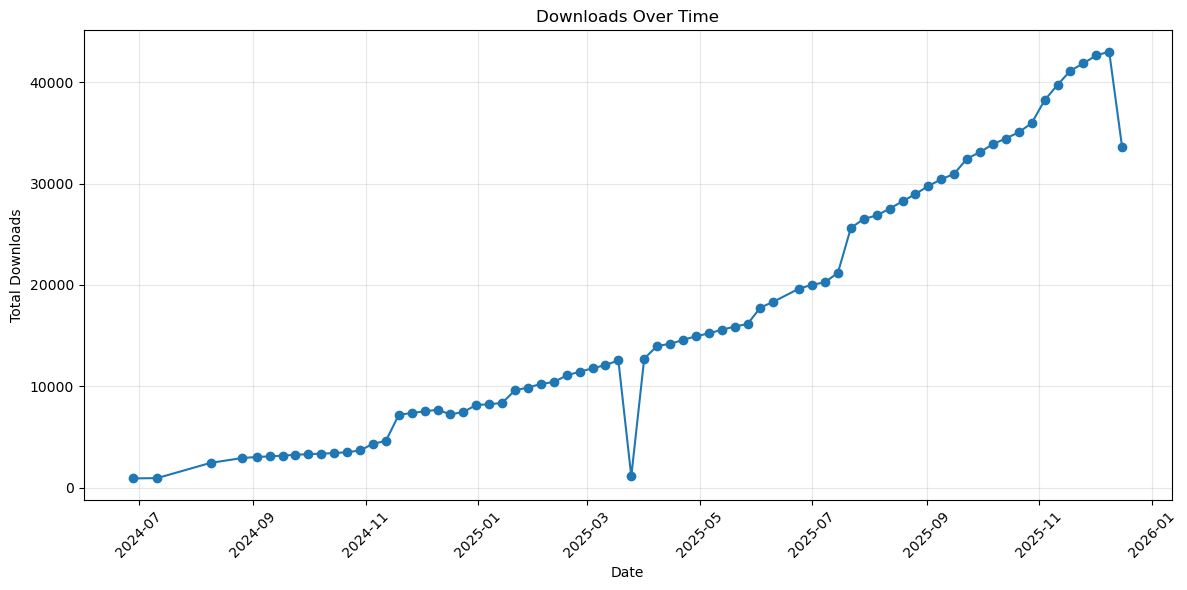

Total CSV files processed: 71
Total records in accumulated dataframe: 14958
Records after filtering: 3624


,date,downloads
0,2024-06-28,912
1,2024-07-11,938
2,2024-08-09,2444
3,2024-08-26,2918
4,2024-09-03,3026


In [10]:
# Group by date and sum downloads
daily_downloads = filtered_df.groupby('date')['downloads'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_downloads['date'], daily_downloads['downloads'], marker='o')
plt.title('Downloads Over Time')
plt.xlabel('Date')
plt.ylabel('Total Downloads')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show the summary
print(f"Total CSV files processed: {len(csv_files)}")
print(f"Total records in accumulated dataframe: {len(accumulated_df)}")
print(f"Records after filtering: {len(filtered_df)}")
daily_downloads.head()

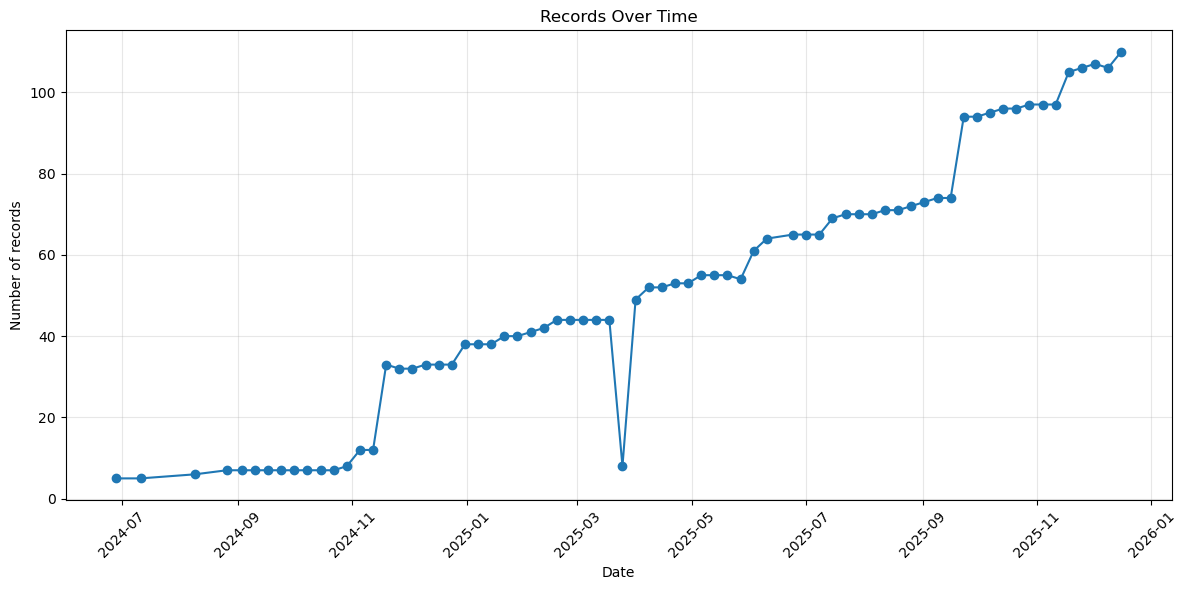

In [11]:
# Group by date and sum downloads
number_of_records = filtered_df.groupby('date')['url'].count().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_downloads['date'], number_of_records['url'], marker='o')
plt.title('Records Over Time')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()